# Cross-Asset Multi-Factor Strategy

## 0. Import libraries

In [8]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from pathlib import Path

root_path = Path('.').resolve()
data_path = root_path / 'mentor_materials' / 'data'

In [10]:
import quantstats as qs

In [11]:
# Custom libraries

from config import PathConfig, PMConfig
import pm

## 1. Data import

### Import all assets

In [12]:
allAssets_df = pd.read_csv(data_path / 'Data.csv')
allAssets_df.head()

,Date,DAX Index,Eurostoxx 50 Index,FTSE 100 Index,S&P 500 Index,Nasdaq 100 Index,Nikkei 225 Index,Topix Index,KOSPI 200 Index,Hang Seng Index,...,UST 5Y,UST 10Y,UST Long,Euro Schatz,Euro Bobl,Euro Bund,Gilt 10Y,JGB 10Y,AGB 3Y,AGB 10Y
0,2000-01-03,8768.903220,2443.196385,4663.410938,1110.469607,3472.256961,14612.63447,1183.492979,125.774501,10900.421630,...,67.205578,56.429022,54.465692,94.644953,80.314443,70.939571,66.326959,101.388587,91.795922,91.597163
1,2000-01-04,8544.026504,2347.719768,4483.277751,1068.829363,3213.045685,14791.12124,1188.332027,127.696511,10671.302490,...,67.431537,67.431537,54.920204,54.920204,94.663425,80.322243,70.829715,65.427993,91.628770,91.439483
2,2000-01-05,8417.734710,2292.443832,4391.038865,1070.154279,3172.402802,14251.78078,1131.646032,118.414606,9827.014147,...,67.173303,67.173303,54.352064,54.352064,94.663425,80.314443,70.644332,65.011255,91.717262,91.557743
3,2000-01-06,8383.584378,2278.876102,4336.564450,1062.961874,2991.767767,13875.40650,1088.785889,113.633019,9393.884811,...,67.291657,67.291657,54.787638,54.787638,94.672662,80.314443,70.548208,64.939814,91.628770,91.459193
4,2000-01-07,8801.764861,2353.749870,4365.973950,1105.169939,3217.109974,14077.17415,1103.994327,114.383072,9566.508822,...,67.442294,67.442294,55.109584,55.109584,94.866625,80.696670,71.124953,65.231531,91.628770,91.478903


In [13]:
# Convert str type date to pd.datetime64
allAssets_df.loc[:, "Date"] = pd.to_datetime(allAssets_df.loc[:, "Date"], format="%Y-%m-%d")

In [14]:
allAssets_df.set_index("Date", drop=False, inplace=True)

In [15]:
allAssets_df.columns

Index(['Date', 'DAX Index', 'Eurostoxx 50 Index', 'FTSE 100 Index',
       'S&P 500 Index', 'Nasdaq 100 Index', 'Nikkei 225 Index', 'Topix Index',
       'KOSPI 200 Index', 'Hang Seng Index', 'EURUSD', 'GBPUSD', 'SEKUSD',
       'CADUSD', 'JPYUSD', 'AUDUSD', 'NZDUSD', 'USDKRW', 'Brent Crude',
       'WTI Crude', 'Heating Oil', 'Natural Gas', 'Gold', 'Silver', 'Copper',
       'Corn', 'Soybean', 'Eurodollar', 'UST 2Y', 'UST 5Y', 'UST 10Y',
       'UST Long', 'Euro Schatz', 'Euro Bobl', 'Euro Bund', 'Gilt 10Y',
       'JGB 10Y', 'AGB 3Y', 'AGB 10Y'],
      dtype='object')

In [16]:
allAssets_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5590 entries, 2000-01-03 to 2021-06-04
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5590 non-null   datetime64[ns]
 1   DAX Index           5590 non-null   float64       
 2   Eurostoxx 50 Index  5590 non-null   float64       
 3   FTSE 100 Index      5590 non-null   float64       
 4   S&P 500 Index       5590 non-null   float64       
 5   Nasdaq 100 Index    5590 non-null   float64       
 6   Nikkei 225 Index    5590 non-null   float64       
 7   Topix Index         5590 non-null   float64       
 8   KOSPI 200 Index     5590 non-null   float64       
 9   Hang Seng Index     5590 non-null   float64       
 10  EURUSD              5590 non-null   float64       
 11  GBPUSD              5590 non-null   float64       
 12  SEKUSD              5590 non-null   float64       
 13  CADUSD              5590 non-n

### Divide dataframe into eash asset class

In [17]:
allAssets_df.drop('Date', axis=1, inplace=True)

In [18]:
equity_df = allAssets_df.iloc[:, 0:9].copy()

In [19]:
equity_df.columns

Index(['DAX Index', 'Eurostoxx 50 Index', 'FTSE 100 Index', 'S&P 500 Index',
       'Nasdaq 100 Index', 'Nikkei 225 Index', 'Topix Index',
       'KOSPI 200 Index', 'Hang Seng Index'],
      dtype='object')

In [20]:
currency_df = allAssets_df.iloc[:, 9:17].copy()

In [21]:
currency_df.columns

Index(['EURUSD', 'GBPUSD', 'SEKUSD', 'CADUSD', 'JPYUSD', 'AUDUSD', 'NZDUSD',
       'USDKRW'],
      dtype='object')

In [22]:
commodity_df = allAssets_df.iloc[:, 17:26].copy()

In [23]:
commodity_df.columns

Index(['Brent Crude', 'WTI Crude', 'Heating Oil', 'Natural Gas', 'Gold',
       'Silver', 'Copper', 'Corn', 'Soybean'],
      dtype='object')

In [24]:
fixed_df = allAssets_df.iloc[:, 26:].copy()

In [25]:
fixed_df.columns

Index(['Eurodollar', 'UST 2Y', 'UST 5Y', 'UST 10Y', 'UST Long', 'Euro Schatz',
       'Euro Bobl', 'Euro Bund', 'Gilt 10Y', 'JGB 10Y', 'AGB 3Y', 'AGB 10Y'],
      dtype='object')

### Save data by asset class

In [26]:
allAssets_df.to_pickle(data_path / "allAssets_df.pkl")
equity_df.to_pickle(data_path / "equity_df.pkl")
currency_df.to_pickle(data_path / "currency_df.pkl")
commodity_df.to_pickle(data_path / "commodity_df.pkl")
fixed_df.to_pickle(data_path / "fixed_df.pkl")

## 2. Make momentum PM

### Reimport data

In [27]:
allAssets_df = pd.read_pickle(data_path / "allAssets_df.pkl")
equity_df = pd.read_pickle(data_path / "equity_df.pkl")
currency_df = pd.read_pickle(data_path / "currency_df.pkl")
commodity_df = pd.read_pickle(data_path / "commodity_df.pkl")
fixed_df = pd.read_pickle(data_path / "fixed_df.pkl")

## PM class

### Base PM class

In [45]:
class DefaultPM:
    def __init__(self) -> None:
        self.signal = None
        self.returns = None
        self.port_returns = None

    def plot_result(self, benchmark="SPY"):
        qs.reports.full(self.port_returns, benchmark=benchmark)

    def get_returns(self):
        if self.prices is not None:
            self.returns = self.prices.pct_change().fillna(0)
            return self.returns
        else:
            raise Exception("return series not yet calculated")
    
    def get_port_returns(self, cost, rebalance_weight, weighting):
        if self.returns.any(axis=None) and self.signal.any(axis=None):
            # self.port_returns = ((self.signal * self.returns - cost) * rebalance_weight * weighting).sum(axis=1)
            self.port_returns = (self.signal * self.returns - cost).sum(axis=1) * rebalance_weight
            return self.port_returns
        else:
            raise Exception("portfolio return series cannot be calculcated")
    
    def get_holding_returns(self, prices, holding_period):
        holding_returns = prices.pct_change(periods=holding_period).shift(-holding_period).fillna(0)
        return holding_returns
    
    @staticmethod
    def scale_signal(signal, booksize): # TODO: 추후 scaleAll처럼 바꿔준다. 
        signal = signal.copy() # shape: (di, ii)
        scale_factor = booksize / np.sum(np.fabs(signal), axis=1) # shape: (di)
        scale_factor = scale_factor[:, None] # shape: (di, 1)
        
        return signal * scale_factor # numpy broadcasting
    
    @staticmethod
    def normalize_signal(signal):
        signal = signal.copy()
        index = signal.index 
        columns = signal.columns

        normalized_signal = np.array(signal) / np.array(signal.sum(axis=1)[:, None])
        normalized_signal = pd.DataFrame(normalized_signal, index=index, columns=columns)
        

        return normalized_signal

### Simple crossover momentum

In [46]:
class PM1(DefaultPM):
    name = "price_sma_momentum"
    description = "Simple price / SMA crossover momentum for a single asset"
    hyperparams = ["sma_days"]
    # load_path = PathConfig.data_path
    scheme = "D-1"

    def __init__(
        self, 
        prices,
        sma_days,
        holding_period,
        cost=0.001,
        booksize=1000000
        ) -> None:

        self.prices = prices
        self.returns = self.get_returns()
        self.holding_returns = self.get_holding_returns(prices, holding_period)
        self.rebalance_weight = 1 / holding_period

        self.cost = cost
        self.booksize = booksize

        # hyperparams
        self.sma_days = sma_days

    def make_signal(self):
        sma = self.prices.rolling(window=self.sma_days).mean()
        signal = self.prices - sma
        signal = signal.shift(1)

        signal = self.normalize_signal(signal)
        self.signal = signal

        return signal
        

In [47]:
pm1 = PM1(
    prices=equity_df,
    sma_days=20,
    holding_period=5,
    )

In [50]:
pm1.make_signal()

C:\Users\chlje\AppData\Local\Temp\ipykernel_22748\3734466324.py:43: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  normalized_signal = np.array(signal) / np.array(signal.sum(axis=1)[:, None])


,DAX Index,Eurostoxx 50 Index,FTSE 100 Index,S&P 500 Index,Nasdaq 100 Index,Nikkei 225 Index,Topix Index,KOSPI 200 Index,Hang Seng Index
Date,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-31,0.105095,0.040192,0.010929,0.020263,0.113986,0.276174,0.021562,0.001625,0.410174
2021-06-01,0.062329,0.027791,0.010841,0.024669,0.145070,0.254082,0.013480,0.002630,0.459107
2021-06-02,0.116637,0.037567,0.033441,0.017782,0.099577,0.113190,0.006325,0.003348,0.572132


In [51]:

pm1.get_port_returns(
    cost=0.001,
    rebalance_weight=pm1.rebalance_weight,
    weighting=None,
)

Date
2000-01-03    0.000000
2000-01-04    0.000000
2000-01-05    0.000000
2000-01-06    0.000000
2000-01-07    0.000000
                ...   
2021-05-31   -0.002381
2021-06-01   -0.000821
2021-06-02   -0.002372
2021-06-03   -0.002643
2021-06-04   -0.002197
Length: 5590, dtype: float64

#### result

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2000-01-03  2000-01-03
End Period                 2021-06-04  2021-06-04
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      97.0%

Cumulative Return          -99.99%     331.99%
CAGR﹪                     -36.65%     7.07%

Sharpe                     -1.4        0.44
Smart Sharpe               -1.38       0.43
Sortino                    -1.84       0.62
Smart Sortino              -1.8        0.61
Sortino/√2                 -1.3        0.44
Smart Sortino/√2           -1.28       0.43
Omega                      0.45        0.45

Max Drawdown               -99.99%     -55.19%
Longest DD Days            7795        2404
Volatility (ann.)          27.89%      19.44%
R^2                        0.01        0.01
Calmar                     -0.37       0.13
Skew                       -7.46       0.0
Kurtosis                   689.33      12

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2000-01-31,2021-06-04,2021-06-04,7795,-99.994373,-99.993862


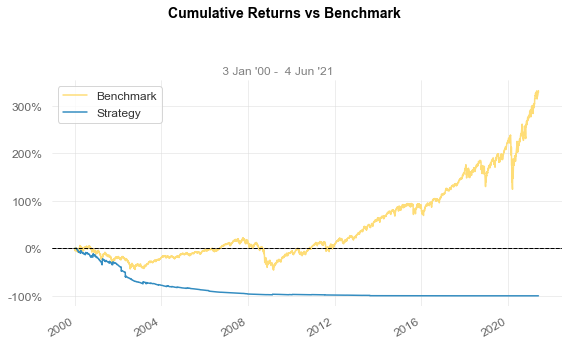

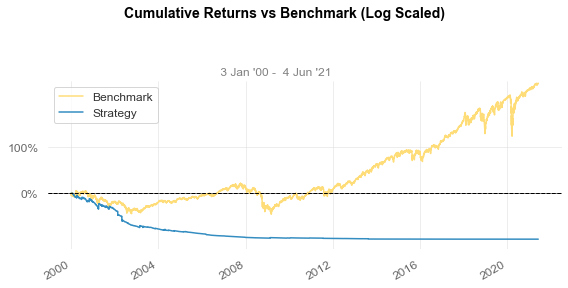

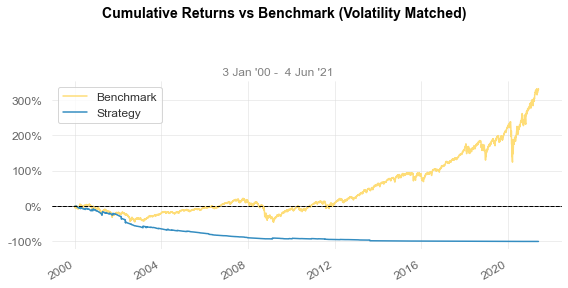

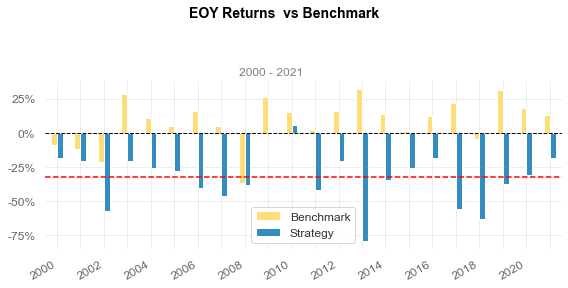

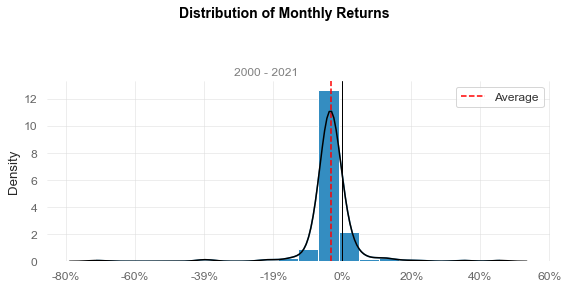

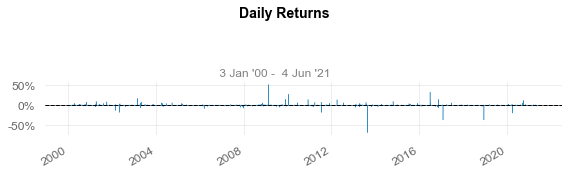

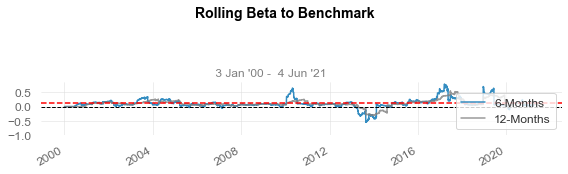

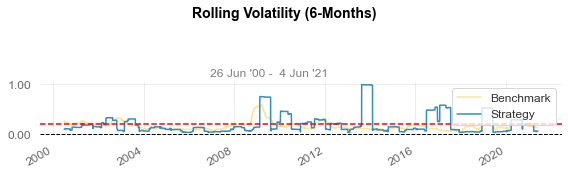

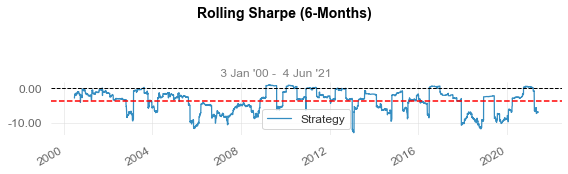

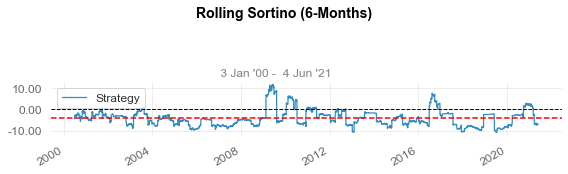

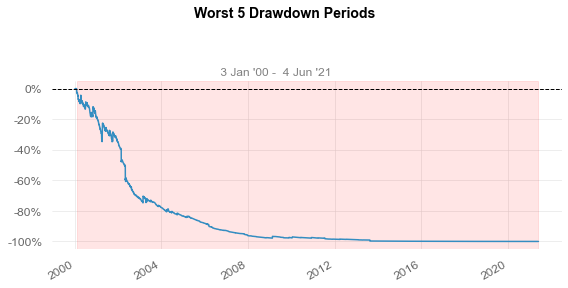

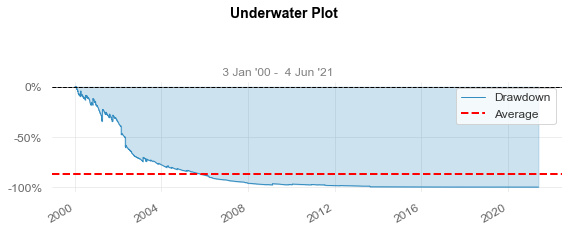

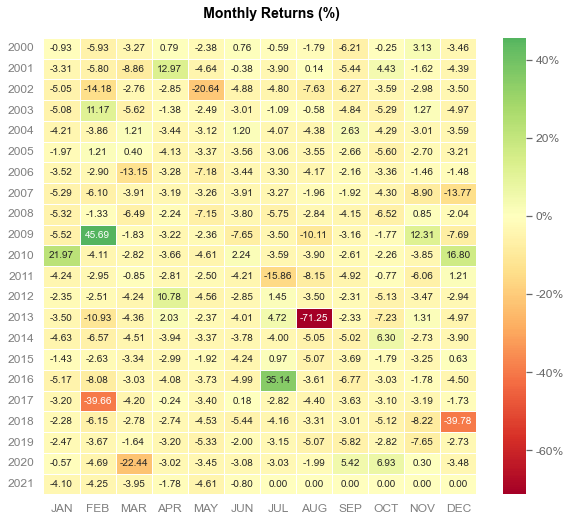

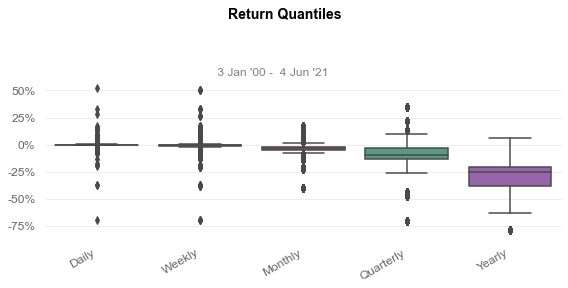

In [52]:
pm1.plot_result()

### Simple crossover momentum (for testing)

In [53]:
class PM1(DefaultPM):
    name = "price_sma_momentum"
    description = "Simple price / SMA crossover momentum for a single asset"
    hyperparams = ["sma_days"]
    # load_path = PathConfig.data_path
    scheme = "D-1"

    def __init__(
        self, 
        prices,
        sma_days,
        holding_period,
        cost=0.001,
        booksize=1000000
        ) -> None:

        self.prices = prices
        self.returns = self.get_returns()
        self.holding_returns = self.get_holding_returns(prices, holding_period)
        self.rebalance_weight = 1 / holding_period

        self.cost = cost
        self.booksize = booksize

        # hyperparams
        self.sma_days = sma_days

    def make_signal(self):
        sma = self.prices.rolling(window=self.sma_days).mean()
        signal = self.prices - sma
        signal = signal.shift(1)

        signal[signal > 0] = 1
        signal[signal < 0] = -1

        signal = self.normalize_signal(signal)

        self.signal = signal

        return signal
        

In [54]:
pm1 = PM1(
    prices=equity_df,
    sma_days=20,
    holding_period=5,
    )

In [55]:
pm1.make_signal()
pm1.get_port_returns(
    cost=0.001,
    rebalance_weight=pm1.rebalance_weight,
    weighting=None,
)

C:\Users\chlje\AppData\Local\Temp\ipykernel_22748\3734466324.py:43: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  normalized_signal = np.array(signal) / np.array(signal.sum(axis=1)[:, None])


Date
2000-01-03    0.000000
2000-01-04    0.000000
2000-01-05    0.000000
2000-01-06    0.000000
2000-01-07    0.000000
                ...   
2021-05-31   -0.002390
2021-06-01   -0.001125
2021-06-02   -0.001408
2021-06-03   -0.001791
2021-06-04   -0.002110
Length: 5590, dtype: float64

#### result

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2000-01-03  2000-01-03
End Period                 2021-06-04  2021-06-04
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      97.0%

Cumulative Return          -99.99%     331.99%
CAGR﹪                     -36.84%     7.07%

Sharpe                     -7.46       0.44
Smart Sharpe               -7.29       0.43
Sortino                    -7.82       0.62
Smart Sortino              -7.64       0.6
Sortino/√2                 -5.53       0.44
Smart Sortino/√2           -5.4        0.43
Omega                      0.22        0.22

Max Drawdown               -99.99%     -55.19%
Longest DD Days            7795        2404
Volatility (ann.)          5.92%       19.44%
R^2                        0.13        0.13
Calmar                     -0.37       0.13
Skew                       0.04        0.0
Kurtosis                   17.22       12.

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2000-01-31,2021-06-04,2021-06-04,7795,-99.994714,-99.994148


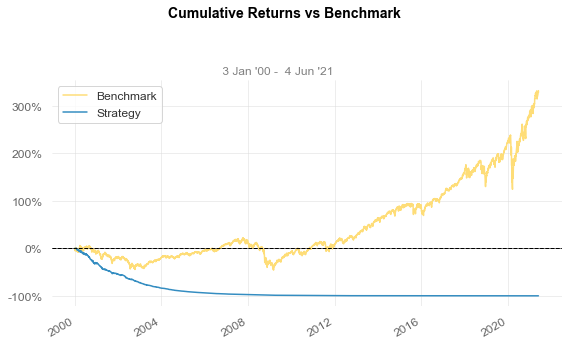

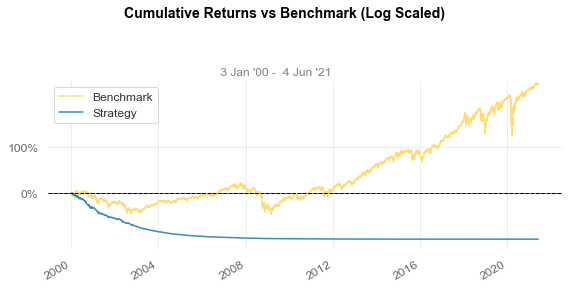

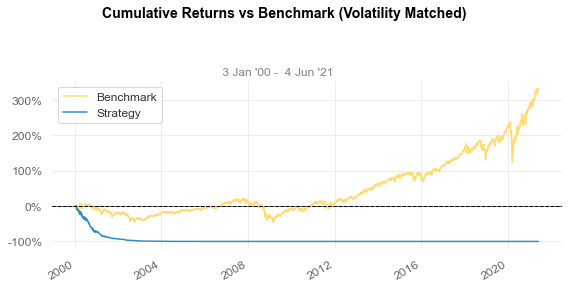

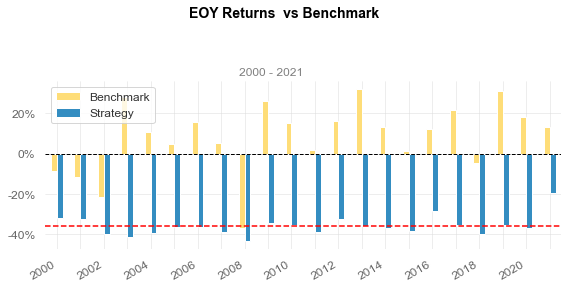

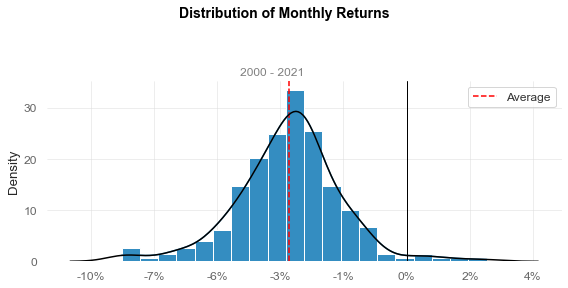

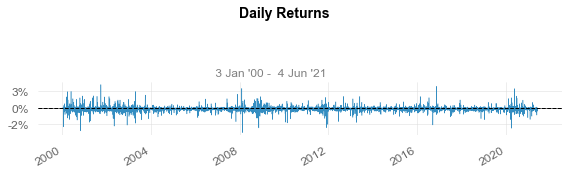

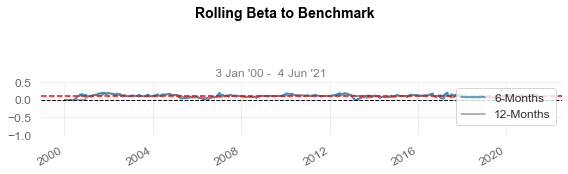

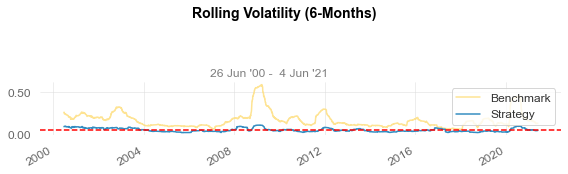

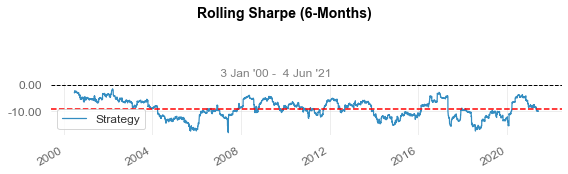

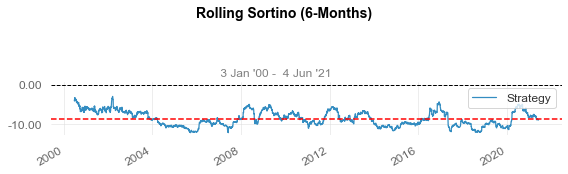

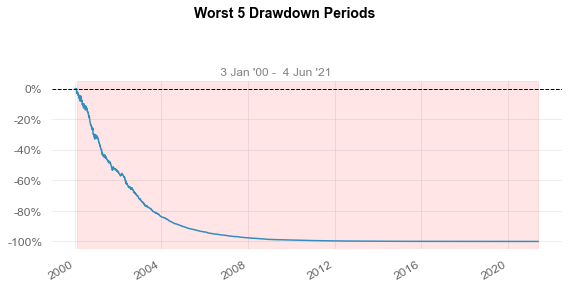

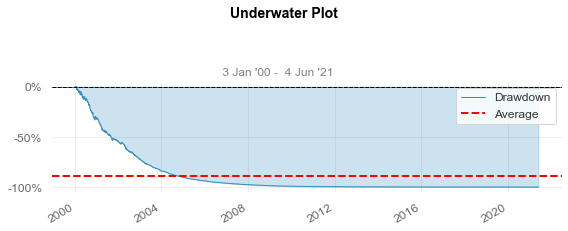

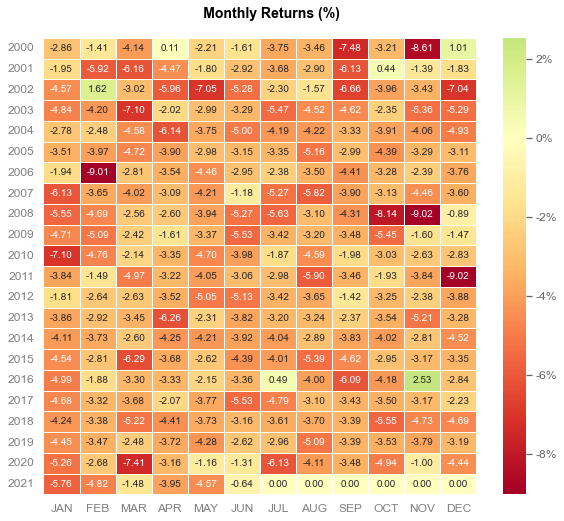

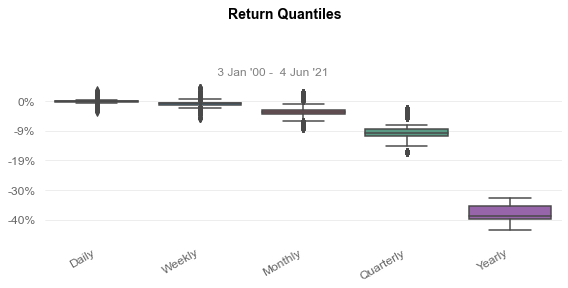

In [56]:
pm1.plot_result()

### SMA crossover momentum

In [57]:
class PM2(DefaultPM):
    name = "sma_crossover_momentum"
    description = "Fast SMA & Slow SMA crossover momentum for a single asset"
    hyperparams = ["sma_days_fast", "sma_days_slow"]
    # load_path = PathConfig.data_path
    scheme = "D-1"

    def __init__(
        self, 
        prices,
        sma_days_fast,
        sma_days_slow,
        holding_period,
        cost=0.001,
        booksize=1000000
        ) -> None:

        self.prices = prices
        self.returns = self.get_returns()
        self.holding_returns = self.get_holding_returns(prices, holding_period)
        self.rebalance_weight = 1 / holding_period
        
        self.cost = cost
        self.booksize = booksize

        # hyperparams
        self.sma_days_fast = sma_days_fast
        self.sma_days_slow = sma_days_slow

    def make_signal(self):
        sma_fast = self.prices.rolling(window=self.sma_days_fast).mean()
        sma_slow = self.prices.rolling(window=self.sma_days_slow).mean()

        signal = sma_fast - sma_slow
        signal = signal.shift(1)

        signal = self.normalize_signal(signal)

        self.signal = signal

        return signal
        

In [58]:
pm2 = PM2(
    prices=equity_df,
    sma_days_fast=20,
    sma_days_slow=60,
    holding_period=5,
    )

In [59]:
pm2.make_signal()
pm2.get_port_returns(
    cost=0.001,
    rebalance_weight=None,
    weighting=None,
)

C:\Users\chlje\AppData\Local\Temp\ipykernel_22748\3734466324.py:43: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  normalized_signal = np.array(signal) / np.array(signal.sum(axis=1)[:, None])


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

#### result

                           Strategy                 Benchmark
-------------------------  -----------------------  -----------
Start Period               2000-01-03               2000-01-03
End Period                 2021-06-04               2021-06-04
Risk-Free Rate             0.0%                     0.0%
Time in Market             99.0%                    97.0%

Cumulative Return          -100.0%                  331.99%
CAGR﹪                     -100.0%                  7.07%

Sharpe                     0.73                     0.44
Smart Sharpe               0.57                     0.34
Sortino                    1.36                     0.62
Smart Sortino              1.07                     0.48
Sortino/√2                 0.96                     0.44
Smart Sortino/√2           0.75                     0.34
Omega                      1.27                     1.27

Max Drawdown               -21460151469.72%         -55.19%
Longest DD Days            6783                     24

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2000-09-22,2001-01-23,2001-01-26,126,-2.146015e+10,-2.130156e+10
2,2001-11-19,2002-11-06,2002-11-07,353,-4.563621e+02,-2.581079e+02
3,2002-11-08,2003-04-07,2021-06-04,6783,-3.408386e+02,-1.001499e+02
4,2000-03-30,2000-04-17,2000-05-30,61,-1.257076e+02,-1.105082e+02
5,2001-05-03,2001-07-04,2001-10-17,167,-9.998677e+01,-9.998529e+01


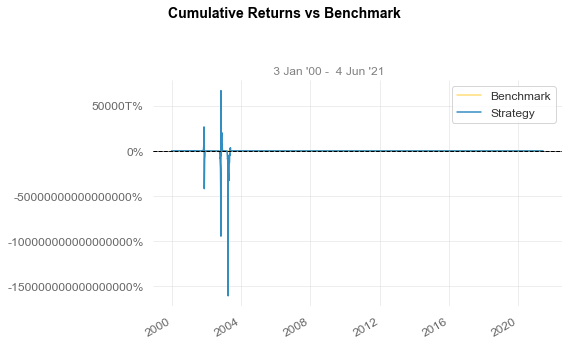

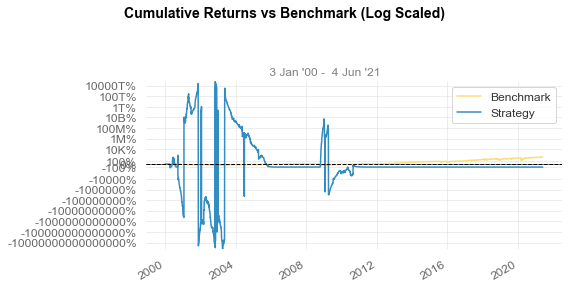

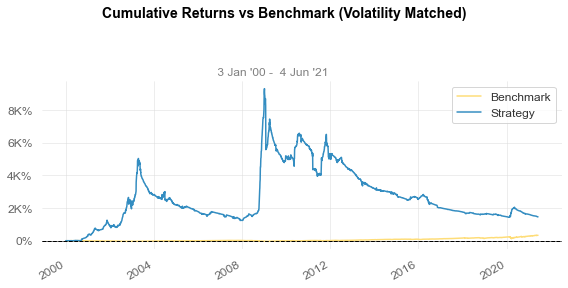

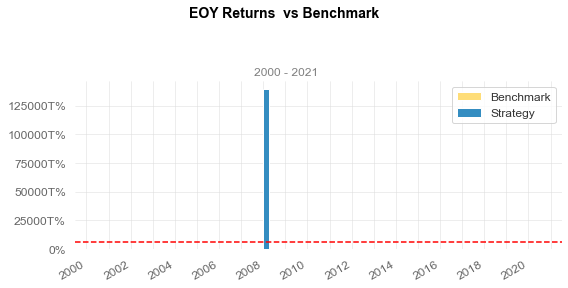

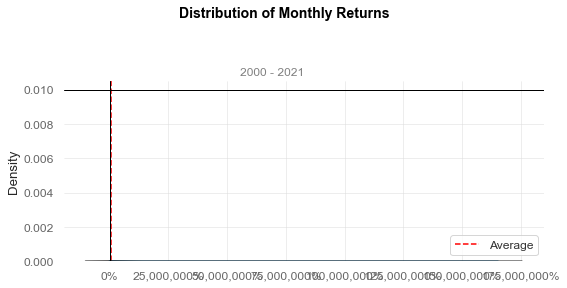

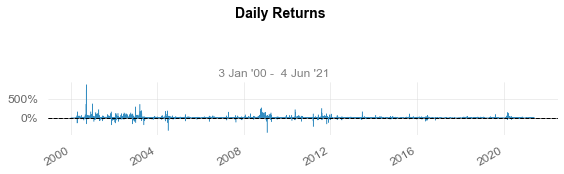

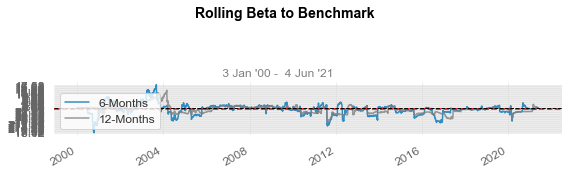

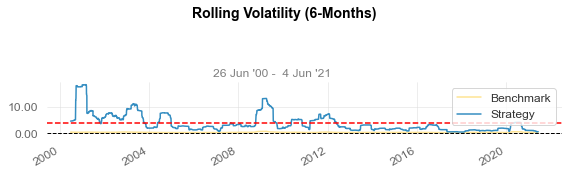

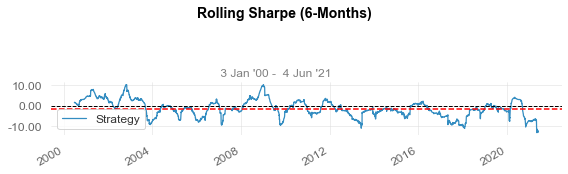

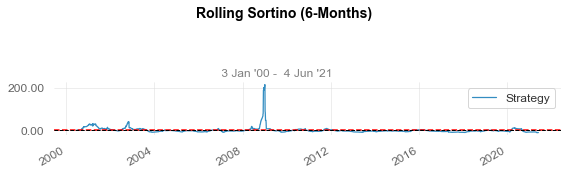

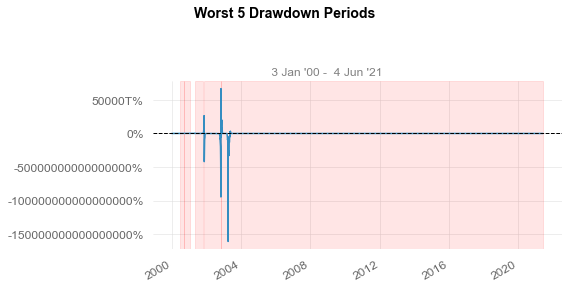

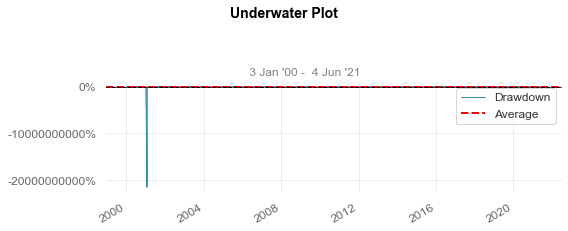

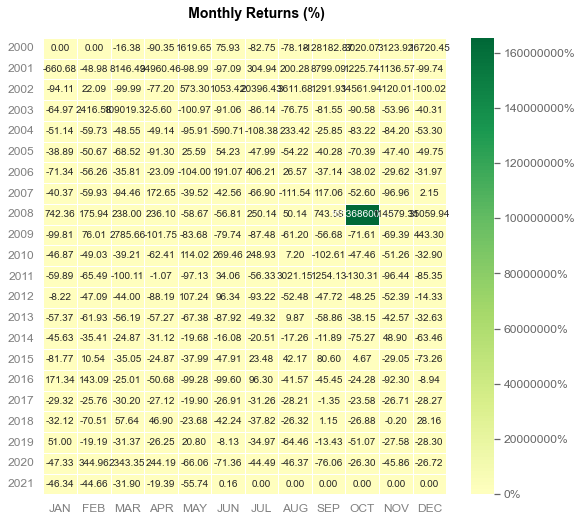

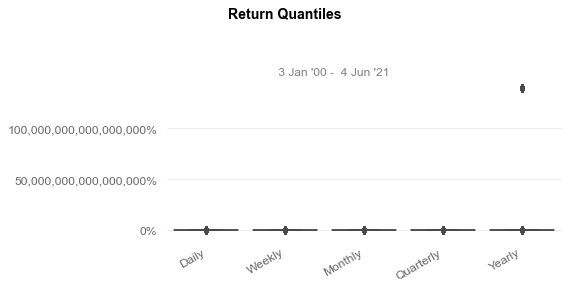

In [96]:
pm2.plot_result()